In [32]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
#ignore all Depricated Warning
simplefilter(action='ignore', category=DeprecationWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=RuntimeWarning)
import pandas as pd
import io
import numpy as np
import os

In [33]:
train_data = pd.read_csv("F:/Project/application_train.csv")

In [34]:
test_data = pd.read_csv("F:/Project/application_test.csv")

In [35]:
print('Training data shape: ', train_data.shape)

Training data shape:  (307511, 122)


In [72]:
dum_train = pd.get_dummies(train_data, drop_first=True)

In [73]:
dum_test= pd.get_dummies(test_data, drop_first=True)

In [74]:
print('Training data shape: ', dum_test.shape)

Training data shape:  (48744, 226)


In [75]:
train_labels = dum_train['TARGET']
train_sk_id_curr = dum_train['SK_ID_CURR']
test_sk_id_curr = dum_test['SK_ID_CURR']

dum_train.drop('SK_ID_CURR', inplace=True, axis=1)
dum_test.drop('SK_ID_CURR', inplace=True, axis=1)

dum_train, dum_test = dum_train.align(dum_test, join = 'inner', axis = 1)
print('Training Features shape: ', dum_train.shape)
print('Testing Features shape: ', dum_test.shape)

Training Features shape:  (307511, 225)
Testing Features shape:  (48744, 225)


In [76]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')
imputer.fit(dum_train)
dum_train = imputer.transform(dum_train)
dum_test = imputer.transform(dum_test)

In [77]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier

In [78]:
X_train, X_test, y_train, y_test = train_test_split(dum_train, train_labels,test_size = 0.3, 
                                                    random_state=2018,
                                                    stratify=y)

# Default: Tree Classifier
model_rf = BaggingClassifier(random_state=2019,oob_score=True,
                             max_features=dum_train.shape[1],
                             n_estimators=50)

In [79]:
model_rf.fit( X_train , y_train )

print("Out of Bag Score = " + "{:.4f}".format(model_rf.oob_score_))

y_pred = model_rf.predict(X_test)

Out of Bag Score = 0.9177


In [80]:
y_pred = model_rf.predict(X_test)

In [81]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[84690   116]
 [ 7348   100]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96     84806
          1       0.46      0.01      0.03      7448

avg / total       0.88      0.92      0.88     92254

0.919092939059553


In [82]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model_rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

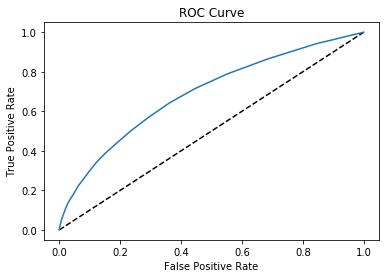

In [83]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [84]:
roc_auc_score(y_test, y_pred_prob)

0.6878438061059711

In [85]:
predictions = model_rf.predict(dum_test)

In [86]:
submission = pd.DataFrame({'SK_ID_CURR': test_sk_id_curr, 'TARGET': predictions})

In [87]:
submission.to_csv("F:/Project/submit_bagging_imp.csv", index = False)